In [1]:
from preamble import *
from tools import plot_feature_importance
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from datasets.load_data import load_train_test_breast_cancer

#### 2.3.7. 核支持向量机 ( Kernelized Support Vector Machine )
#### 1. 线性模型与非线性特征

Text(0,0.5,'Feature 1')

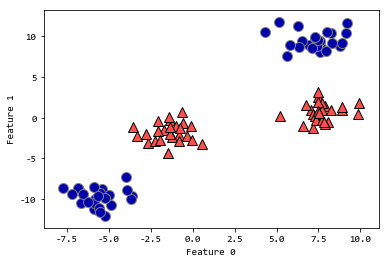

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
# 图2-36：二分类数据集（类别不是线性可分)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

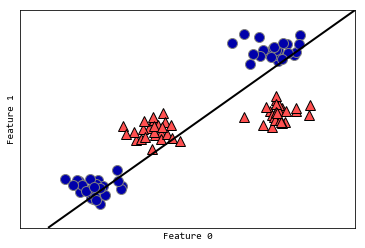

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
# 图2-37：线性SVM给出的决策边界
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5,0,'feature1 ** 2')

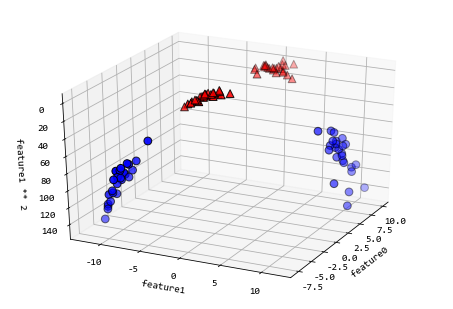

In [4]:
# 为模拟数据增加一个新的特征，将线性不可分的数据变换到三维空间，变成线性可分
X_new = np.hstack([X, X[:, 1:] ** 2])

# 图2-38：将图2-37中的二维数据扩展成三维数据
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = (y == 0)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0.5,0,'feature1 ** 2')

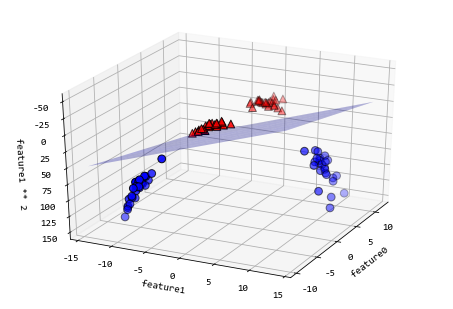

In [5]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 图2-39：线性SVM对扩展后的三维数据集给出的决策边界
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0,0.5,'Feature 1')

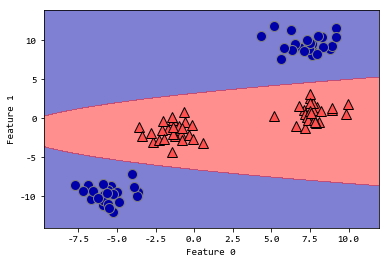

In [6]:
# 图2-40：将图2-39的三维决策边界投影到原始的二维平面上
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 2. 核技巧
-   核技巧：直接计算扩展特征表示中数据点之间的距离（即内积）。
-   常用核：多项式核；高斯核（径向基函数核）

#### 3. 理解 SVM

-   在训练过程中，SVM学习每个训练数据点对于表示两个类别之间的决策边界的重要性。
-   只有一部分训练数据点对于定义决策边界很重要：位于类别之间边界上的点叫做支持向量。
-   分类决策面基于边界与支持向量之间的距离以及在训练过程中学到的支持向量的重要性来做出的。
-   属性：`dual_coef_`，保存SVC的支持向量的重要性
-   数据点之间的距离由高斯核给出：$\gamma$是控制高斯核宽度的参数
\begin{align*}
k_{rbf}(x_1,x_2)=exp(-\gamma\|x_1-x_2\|^2)
\end{align*}

Text(0,0.5,'Feature 1')

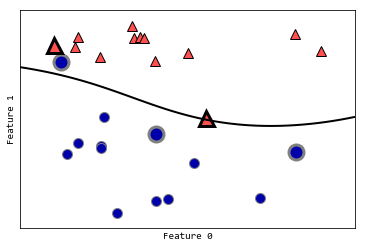

In [7]:
# 图2-41：RBF核SVM给出的两个数据中心的高斯数据的决策边界和支持向量
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 4. SVM 调参

参数（gamma）：控制高斯核的宽度，决定了点与点之间“靠近”的距离。
- 值小，高斯核半径大，许多点都被认为“靠近”，决策边界变化慢，模型复杂度低；
- 值大，高斯核半径小，决策边界变化快，模型复杂度高。

参数（C）：正则化参数。
- 值小，模型受限，每个数据点的影响范围有限，决策边界是线性的，如果数据含有噪声，则误分类的点对边界几乎没有影响；
- 值大，模型受每个数据点的影响变大，决策边界是非线性的，如何数据可信度高，则尽可能使每个点被正确分类。

默认情况下：C=1，$\gamma=1/n_{features}$

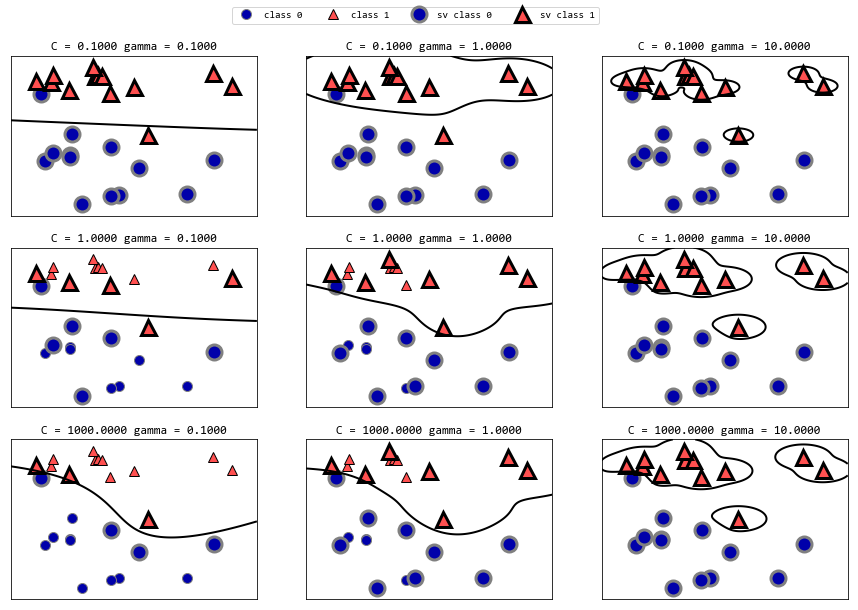

In [8]:
# 图2-42：设置不同的 C 和 gamma 参数--两个数据中心的高斯数据对应的决策边界和支持向量
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [9]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


Text(0,0.5,'Feature magnitude')

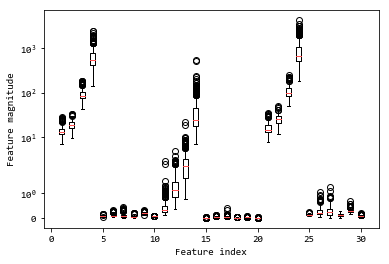

In [10]:
# 图2-43：Cancer 数据集的特征数据的取值范围--（注意y轴的对数坐标）
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

##### 5. 为 SVM 预处理数据

In [11]:
# 计算训练数据集的每个特征的最小值
min_on_training = X_train.min(axis=0)
# 计算训练数据集的每个特征的取值范围 (max - min) 
range_on_training = (X_train - min_on_training).max(axis=0)

# 数据归一化，保证所有特征的最小值为0，最大值为1
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
# 使用同样的方式对测试数据集进行变换
# 不能使用测试数据集的最小值和取值范围来进行归一化，会导致数据放缩比例与训练数据集不相符
# 也不能使用所有数据进行归一化，会导致测试数据的信息泄漏到训练数据中，与真实情况不符
X_test_scaled = (X_test - min_on_training) / range_on_training

In [13]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [14]:
# 调整 C 和 gamma 的值来拟合更加复杂的模型
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))
print("svc.C=",svc.C)
print("svc.gamma=",svc.gamma)

Accuracy on training set: 1.000
Accuracy on test set: 0.958
svc.C= 1000
svc.gamma= scale


In [15]:
# C 越小，考虑的是全局，模型也越简单；C 越大，考虑的是每个点的正确性，模型也越复杂
print('=' * 20)
for c_value in [1, 10, 100, 1000]:
    svc = SVC(C=c_value, gamma='auto')
    svc.fit(X_train_scaled, y_train)
    print('C=', c_value)
    print('Training set score: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
    print('Test set score: {:.3f}'.format(svc.score(X_test_scaled, y_test)))
    print('-' * 20)
    pass

C= 1
Training set score: 0.948
Test set score: 0.951
--------------------
C= 10
Training set score: 0.977
Test set score: 0.958
--------------------
C= 100
Training set score: 0.986
Test set score: 0.965
--------------------
C= 1000
Training set score: 0.988
Test set score: 0.972
--------------------


In [16]:
# gamma越小，高斯核的范围越宽；gamma越大，高斯核的范围越窄
# 过拟合会严重影响测试集的精确度
print('=' * 20)
for gamma in [0.1, 1, 10, 100]:
    svc = SVC(gamma=gamma)
    svc.fit(X_train_scaled, y_train)
    print('gamma=', gamma)
    print('Training set score: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
    print('Test set score: {:.3f}'.format(svc.score(X_test_scaled, y_test)))
    print('-' * 20)

gamma= 0.1
Training set score: 0.958
Test set score: 0.951
--------------------
gamma= 1
Training set score: 0.984
Test set score: 0.972
--------------------
gamma= 10
Training set score: 0.986
Test set score: 0.937
--------------------
gamma= 100
Training set score: 1.000
Test set score: 0.629
--------------------


In [17]:
# 两个最优的参数，结果不最优
# 过拟合会严重影响测试集的精确度
# 根据影响力调整的的参数，结果接近最优，重要的是防止过拟合，可以提高测试集的精确度
print('=' * 20)
for c_value, gamma in [(0.1, 10), (0.1, 20), (1, 1), (1, 10), (1, 20), (10, 1000)]:
    svc = SVC(C=c_value, gamma=gamma)
    svc.fit(X_train_scaled, y_train)
    print('C=', c_value, 'gamma=', gamma)
    print('Training set score: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
    print('Test set score: {:.3f}'.format(svc.score(X_test_scaled, y_test)))
    print('-' * 20)
    pass    

C= 0.1 gamma= 10
Training set score: 0.667
Test set score: 0.643
--------------------
C= 0.1 gamma= 20
Training set score: 0.627
Test set score: 0.629
--------------------
C= 1 gamma= 1
Training set score: 0.984
Test set score: 0.972
--------------------
C= 1 gamma= 10
Training set score: 0.986
Test set score: 0.937
--------------------
C= 1 gamma= 20
Training set score: 1.000
Test set score: 0.881
--------------------
C= 10 gamma= 1000
Training set score: 1.000
Test set score: 0.629
--------------------


#### 5.  优点、缺点和参数
-   优点：核支持向量机可以在各种数据集上都表现良好。允许决策边界任意复杂。
-   缺点：对于数据集中尺度相关较大的特征数据表现不好；需要归一化数据；需要人工调整参数
-   重要参数：
    -   正则化参数 C；
    -   核的选择；
    -   RBF 核参数 gamma，高斯核宽度的倒数